# Linear 2D solution

## Init symbols for *sympy*

In [1]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [2]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')

init_printing()

In [3]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)
A,K,rho = symbols("A K rho")

### Tymoshenko theory

$u_1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u\left( \alpha_1 \right)+\alpha_3\gamma \left( \alpha_1 \right) $

$u_2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u_3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=w\left( \alpha_1 \right) $

$ \left( 
\begin{array}{c} 
u_1 \\
\frac { \partial u_1 } { \partial \alpha_1} \\
\frac { \partial u_1 } { \partial \alpha_2} \\
\frac { \partial u_1 } { \partial \alpha_3} \\
u_2 \\
\frac { \partial u_2 } { \partial \alpha_1} \\
\frac { \partial u_2 } { \partial \alpha_2} \\
\frac { \partial u_2 } { \partial \alpha_3} \\
u_3 \\
\frac { \partial u_3 } { \partial \alpha_1} \\
\frac { \partial u_3 } { \partial \alpha_2} \\
\frac { \partial u_3 } { \partial \alpha_3} \\
\end{array} 
\right) = T \cdot 
\left( 
\begin{array}{c} 
u \\
\frac { \partial u } { \partial \alpha_1} \\
\gamma \\
\frac { \partial \gamma } { \partial \alpha_1} \\
w \\
\frac { \partial w } { \partial \alpha_1} \\
\end{array} 
\right) $

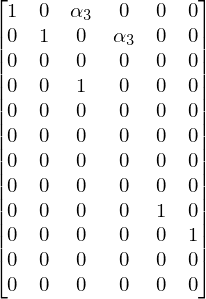

In [4]:
T=zeros(12,6)
T[0,0]=1
T[0,2]=alpha3
T[1,1]=1
T[1,3]=alpha3
T[3,2]=1

T[8,4]=1
T[9,5]=1
T

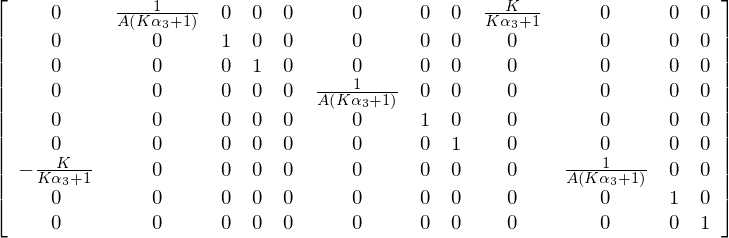

In [5]:
B=Matrix([[0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0, K/(K*alpha3 + 1), 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [-K/(K*alpha3 + 1), 0, 0, 0, 0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
B

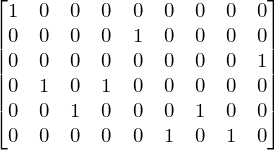

In [6]:
E=zeros(6,9)
E[0,0]=1
E[1,4]=1
E[2,8]=1
E[3,1]=1
E[3,3]=1
E[4,2]=1
E[4,6]=1
E[5,5]=1
E[5,7]=1
E

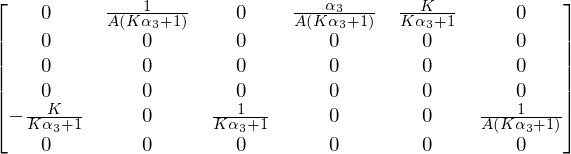

In [7]:
simplify(E*B*T)

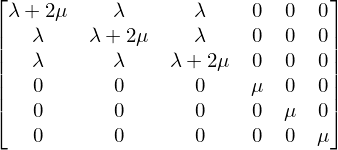

In [8]:
mu = Symbol('mu')
la = Symbol('lambda')
C_tensor = getIsotropicStiffnessTensor(mu, la)
C = convertStiffnessTensorToMatrix(C_tensor)
C

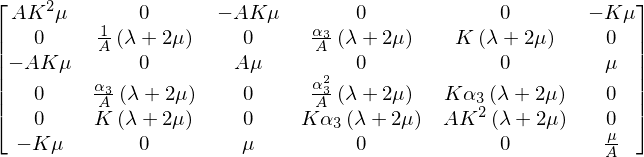

In [9]:
S=T.T*B.T*E.T*C*E*B*T*A*(1+alpha3*K)**2
S=simplify(S)
S

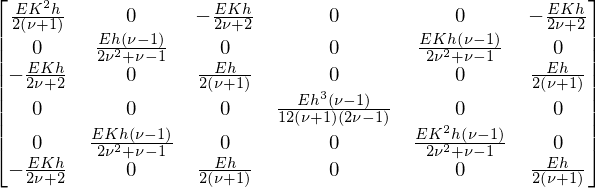

In [10]:
h=Symbol('h')
S_in = integrate(S,(alpha3, -h/2, h/2))
E,nu=symbols('E nu')
lambda_elastic=E*nu/((1+nu)*(1-2*nu))
mu_elastic=E/(2*(1+nu))
S_ins=simplify(S_in.subs(A,1).subs(la,lambda_elastic).subs(mu,mu_elastic))
S_ins

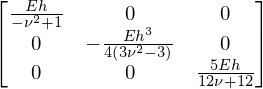

In [11]:

a11=E/(1-nu**2)
a44=5*E/(12*(1+nu))

AM=Matrix([[a11,0],[0,a44]])
strainT=Matrix([[1,alpha3,0],[0,0,1]])
AT=strainT.T*AM*strainT
integrate(AT,(alpha3, -h/2, h/2))

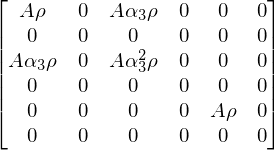

In [12]:
M=Matrix([[rho, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, rho, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, rho, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
M=T.T*M*T*A
M

## Cartesian coordinates

In [31]:
import fem.geometry as g
import fem.model as m
import fem.material as mat
import fem.shell.shellsolver as s
import fem.shell.mesh1D as me
import plot

stiffness_matrix_func = lambdify([A, K, mu, la, alpha3], S, "numpy")
mass_matrix_func = lambdify([A, K, rho, alpha3], M, "numpy")


def stiffness_matrix(material, geometry, x1, x2, x3):
    return stiffness_matrix_func(1, curvature, material.mu(), material.lam(), x3)

def mass_matrix(material, geometry, x1, x2, x3):
    return mass_matrix_func(1, curvature, material.rho, x3)



def generate_layers(thickness, layers_count, material):
    layer_top = thickness / 2
    layer_thickness = thickness / layers_count
    layers = set()
    for i in range(layers_count):
        layer = m.Layer(layer_top - layer_thickness, layer_top, material, i)
        layers.add(layer)
        layer_top -= layer_thickness
    return layers


def solve(geometry, thickness, linear, N_width, N_height):
    layers_count = 1
    layers = generate_layers(thickness, layers_count, mat.IsotropicMaterial.steel())
    model = m.Model(geometry, layers, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    mesh = me.Mesh1D.generate(width, layers, N_width, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    print(mesh.elements)
#     if (linear):
    lam, vec = s.solve(model, mesh, stiffness_matrix, mass_matrix)
#     else:
#         lam, vec = s.solve_nl(model, mesh, stiffness_matrix, mass_matrix, stiffness_matrix_nl)
    
    
    return lam, vec, mesh, geometry


# r=2
# width = r*2*3.14
# curvature = 1/r

width = 2
curvature = 0
thickness = 0.05

corrugation_amplitude = 0.03
corrugation_frequency = 20

# geometry = g.CorrugatedCylindricalPlate(width, curvature, corrugation_amplitude, corrugation_frequency)
# geometry = g.CylindricalPlate(width, curvature)
geometry = g.Plate(width)

N_width = 2
N_height = 4


lam, vec, mesh, geometry = solve(geometry, thickness, False, N_width, N_height)
results = s.convert_to_results(lam, vec, mesh, geometry)

results_index = 0
    
# plot.plot_mesh(results[results_index].mesh, width, thickness)
    
# plot.plot_deformed_mesh(results[results_index], width, thickness)
    
plot.plot_init_and_deformed_geometry(results[results_index], 0, width, -thickness / 2, thickness / 2, 0)
    
#    plot.plot_init_geometry(results[results_index].geometry, 0, width, -thickness / 2, thickness / 2, 0)
    
#    for i in range(6):
#        plot.plot_strain_2(results[results_index], N, M, 0, width, -thickness / 2, thickness / 2, 0, i)
#        plot.plot_strain(results[results_index], 0, width, -thickness / 2, thickness / 2, 0, i)
    
    
to_print = 20
if (len(results) < to_print):
    to_print = len(results)
    
for i in range(to_print):
    print(results[i].rad_per_sec_to_Hz(results[i].freq))


{Element1D(Node1D('1 - (1.000000)'), Node1D('2 - (2.000000)')), Element1D(Node1D('0 - (0.000000)'), Node1D('1 - (1.000000)'))}
[[  2.82692309e+11   0.00000000e+00   0.00000000e+00  -2.82692309e+11
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.69230771e+10  -4.03846156e+10   0.00000000e+00
    1.34615384e+10   4.03846156e+10]
 [  0.00000000e+00  -4.03846156e+10   8.07692312e+10   0.00000000e+00
   -4.03846156e+10  -8.07692312e+10]
 [ -2.82692309e+11   0.00000000e+00   0.00000000e+00   2.82692309e+11
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.34615384e+10  -4.03846156e+10   0.00000000e+00
    2.69230771e+10   4.03846156e+10]
 [  0.00000000e+00   4.03846156e+10  -8.07692312e+10   0.00000000e+00
    4.03846156e+10   8.07692312e+10]]
[[  2.82692309e+11   0.00000000e+00   0.00000000e+00  -2.82692309e+11
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.69230771e+10  -4.03846156e+10   0.00000000e+00
    1.34615384e+10   4.03846156e+10]
 [  0.00000000e+

LinAlgError: the leading minor of order 2 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.